# Le jeu de Nim par apprentissage
> "Quand une machine apprend à jouer contre son adversaire au fur et à mesure des parties jouées"

- toc:true
- branch: master
- badges: true
- author: Nathalie Weibel
- image : my_icons/allumettes.png
- categories: [jupyter, jeu]

In [1]:
%matplotlib notebook
from random import choice, randint
import matplotlib.pyplot as plt

## Les Règles du jeu

**Nombre de joueurs** : 2

**Principe** : on dispose de 8 allumettes. Chaque joueur peut prendre 1, 2 ou 3 allumettes, à tour de rôle. 
Celui qui prend la *dernière* allumette *gagne* la partie. 


![](my_icons/allumettes.png)

**Objectif** : 
L'un des joueurs est un humain, l'autre joueur est "une machine". Celle-ci doit apprendre à jouer contre son adversaire au fur et à mesure des parties jouées.


Cette activité a pour but de présenter une *intelligence artificielle*, plus particulièrement une forme simple d'apprentissage, et de montrer qu'en effectuant des actions élémentaires notre machine peut réussir à trouver la stratégie gagnante à ce jeu.

## Version 1 : sans ordinateur

**Matériel** :
- 8 allumettes
- 8 gobelets numérotés de 1 à 8
- 21 jetons : 8 jetons portant le **n°1**, 7 jetons portant le **n°2** et 6 jetons portant le **n°3**.

Chaque gobelet contient 3 jetons numérotés 1, 2, et 3, sauf le gobelet 1 qui ne contient qu'un jeton numéroté 1, et le gobelet 2 qui ne contient que deux jetons numérotés 1 et 2.

![](my_icons/gobelets_pt.png)

**Déroulement**:

Commencer une partie en laissant l'humain jouer en premier. L'humain joue comme il veut...

Lorsque c'est à la machine de jouer, elle :
- compte le nombre d'allumettes restant et prend le gobelet correspondant,
- pioche au hasard un jeton dans le gobelet, le pose sur la table juste devant ce gobelet, et pioche le nombre d'allumettes indiqué par le jeton (1, 2 ou 3).



En fin de partie, quand il n'y a plus d'allumettes, 
- soit la machine a gagné, et dans ce cas elle remet chaque jeton dans le gobelet où elle l'a pioché, 
- soit elle a perdu et dans ce cas elle remet tous les jetons piochés sauf le dernier -- ce choix a permis à l'humain de gagner -- et elle le met de côté.

Au cours des parties successives, il peut arriver qu'un gobelet soit vide. Dans ce cas on retourne le gobelet à l'envers, et à partir de ce moment-là, si l'adversaire laisse un nombre d'allumettes pour lequel le gobelet est vide, la machine abandonne la partie, considère qu'elle a perdu et remet tous les jetons piochés dans leur gobelet sauf le dernier.

**Constats** : 

La machine va souvent perdre au début, mais au fil des parties elle va s'améliorer et finir par suivre une stratégie qui la fera gagner à tous les coups.

## Version 2 : programme Python 

### Jeu de la machine : 
Les coups possibles au départ pour la machine sont de prendre 1, 2 ou 3 allumettes, s'il en reste au moins 3.

S'il n'en reste que 2, elle peut en prendre 1 ou 2, et s'il n'en reste qu'une, la machine la prend. 

On modélise la situation par un tableau comportant la liste des coups possibles dans chaque cas :

```coups_possibles = [[1], [1, 2]] + [[1,2,3] for i in range(NB_ALLUMETTES - 2)]``` où ```NB_ALLUMETTES``` est le nombre initial d'allumettes, ici 8.

Lorsqu'elle doit jouer, la machine choisit *au hasard* l'un des coups possibles pour le nombre d'allumettes restant. 

Si aucun coup n'est disponible, elle abandonne la partie qu'elle considère comme perdue.

En fin de partie, si la machine a perdu, elle supprime de la liste des coups possibles le dernier coup réalisé.



In [2]:
def jouer_machine(nb_allumettes):
    '''- prend en paramètre le nombre d'allumettes restant à jouer
    - renvoie le nombre d'allumettes prises lors du coup joué par la machine
    et un booléen indiquant si ce coup a conduit à la perte de la partie 
    pour la machine'''
   
    perdu = False
    if coups_possibles[nb_allumettes - 1] != []:
        coup_joue = choice(coups_possibles[nb_allumettes - 1])
    else :
        perdu = True
        coup_joue = 0
    return (coup_joue, perdu)

### Jeu de l'adversaire:
L'adversaire adopte une stratégie élémentaire :
- S'il reste au plus 3 allumettes, il les prend toutes -- et la partie est perdue pour la machine ; 
- sinon, il choisit aléatoirement, entre 1 et 3, le nombre d'allumettes à prendre.

In [3]:
def jouer_adversaire(nb_allumettes):
    '''- prend en paramètre le nombre d'allumettes restant à jouer
    - renvoie le nombre d'allumettes prises lors du coup joué par l'adversaire
    et un booléen indiquant si ce coup a conduit à la perte de la partie 
    pour la machine'''
    
    perdu = False
    if nb_allumettes < 4:
        coup_joue = nb_allumettes
        perdu = True
    else :
        coup_joue = randint(1,3)
    return (coup_joue, perdu)

### Déroulement du jeu

In [1]:
NB_ALLUMETTES = 8

In [5]:
def jouer_partie(n):
    ''' simule le déroulement de n parties successives, en faisant toujours 
    commencer l'adversaire de la machine
    et renvoie la liste des numéros des parties perdues'''
    
    parties_perdues = []
    
    for i in range(n):
        perdu = False # perdu prend la valeur True lorsque la machine perd la partie
        allumettes = [NB_ALLUMETTES] # contient les valeurs successives au 
        # cours d'une partie du nombre d'allumettes restantes 
       
        while not perdu and allumettes[-1] > 0 :
            #l'adversaire joue 
            nb_allumettes, perdu = jouer_adversaire(allumettes[-1])
            allumettes.append(allumettes[-1] - nb_allumettes)
            
            if perdu : 
                # le dernier coup de la machine a permis à l'adversaire de 
                # gagner : on supprime le coup correspondant de la 
                # liste des coups possibles
                coups_possibles[allumettes[-3] - 1].remove(allumettes[-3] - allumettes[-2])
               
            else :
                # la machine joue
                nb_allumettes, perdu = jouer_machine(allumettes[-1])
                allumettes.append(allumettes[-1] - nb_allumettes)
                
                if perdu :  
                    #le précédent coup de la machine a conduit à sa défaite : 
                    # on supprime le coup correspondant de la liste des coups possibles
                    coups_possibles[allumettes[-4] - 1].remove(allumettes[-4] - allumettes[-3])
                    
        if perdu :
            parties_perdues.append(i)
           
    return (parties_perdues)
  

In [6]:
coups_possibles = [[1], [1, 2]] + [[1,2,3] for i in range(NB_ALLUMETTES - 2)]
n = 200
parties_perdues = jouer_partie(n)
print("parties perdues : ",len(parties_perdues), parties_perdues)

parties perdues :  12 [0, 1, 3, 6, 7, 10, 11, 25, 29, 36, 47, 64]


In [7]:
def representation_graphique(n):
    
    liste_resultats=["perdu" if i in parties_perdues else "gagné" for i in range(n)]
    plt.scatter(list(range(n)),liste_resultats, s = 8, c = 'r')
    plt.title('Issue de chaque partie')
    plt.xlabel('numéro de partie jouée')
    plt.ylabel('issue')
    plt.show()

<IPython.core.display.Javascript object>


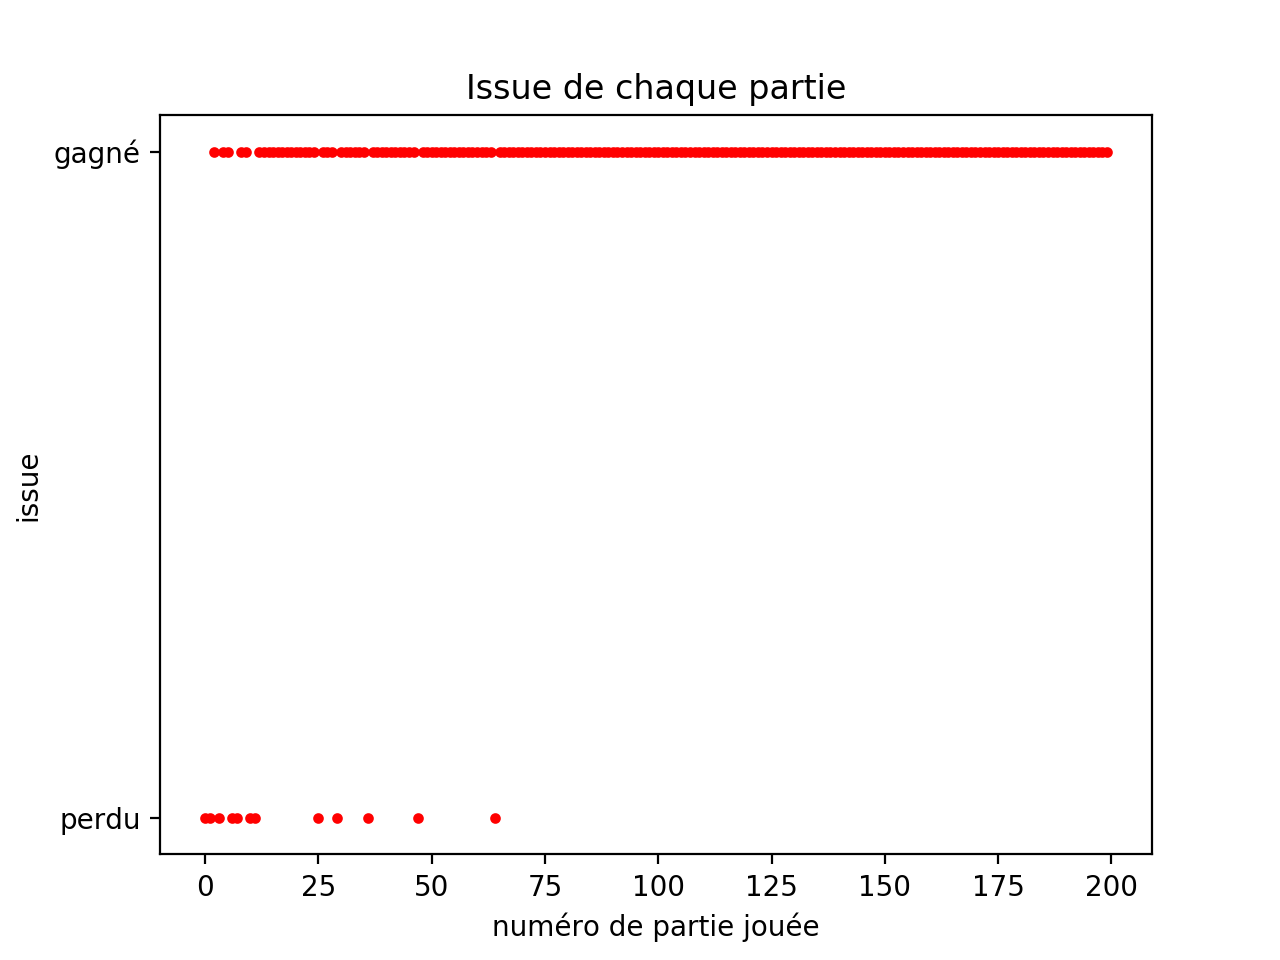

In [8]:
representation_graphique(n)

In [9]:
coups_possibles

[[1], [2], [3], [], [1], [2], [3], [1, 2, 3]]

**Sources** :
- [Quand une machine apprend à jouer au jeu de Nim (Marie Duflot)](https://members.loria.fr/MDuflot/files/med/IAnim.html), ([CC BY SA](https://creativecommons.org/licenses/by-nc-sa/4.0/deed.fr))
